# IMPORTAR LIBRERÍAS

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Split X train y test
from sklearn.model_selection import train_test_split

# Modelos para validación cruzada con cross_val_score y cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelos para validar por regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Validación de modelos:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Calificación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer


# Para imputación categórica a numérica y predicción de columna numérica Destruction Level en Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

# Convertir columnas categóricas (Disaster Subtype, Origin, Associated Disaster) a numéricas para predecir Destruction Level Dis o Mag Value
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
# Pipeline
from sklearn.pipeline import Pipeline
import joblib # guardar pipeline

In [58]:
df = pd.read_csv('../../99 PRUEBAS a los CSV/01 Prueba quitando eventos/04DesNat_DEFS_limpio_fc.csv')
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [59]:
df.shape

(12826, 26)

In [60]:
df['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Central America',
       'South America', 'Western Europe', 'Eastern Asia', 'Caribbean',
       'Northern Africa', 'Northern America', 'South-Eastern Asia',
       'Eastern Europe', 'Southern Europe', 'Melanesia', 'Polynesia',
       'Eastern Africa', 'Northern Europe', 'Western Asia',
       'Australia and New Zealand', 'Micronesia', 'Southern Africa',
       'Middle Africa', 'Russian Federation', 'Central Asia'],
      dtype=object)

Hay 23 regiones. Demasiadas para codificar???. Pensar en codificar por continente

## Codificación categórico a numérico


In [48]:
# El mapeo o la función se hace para la salida, así que no vale para nada
# Función personalizada para tratar la columna Disaster Type
#def classify_disaster(Disaster_Type):
    #if 'Drought' in Disaster_Type:
     #   return 1
    #elif 'Earthquake' in Disaster_Type:
     #   return 2
    #elif 'Storm' in Disaster_Type:
     #   return 3
    #else:
      #  return 4
    
#df['Disaster_int'] = df['Disaster Type'].apply(classify_disaster)
#df['Disaster_int'].value_counts()

## Tratamiento de nulos: en nuestro caso 0

In [61]:
df_filtrado = df.loc[(df['Total Affected'] != 0)]
df_filtrado.shape

(9644, 26)

In [62]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9644 entries, 23 to 12825
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             9644 non-null   object
 1   Year               9644 non-null   int64 
 2   Seq                9644 non-null   int64 
 3   Disaster Subgroup  9644 non-null   object
 4   Disaster Type      9644 non-null   object
 5   Disaster Subtype   7456 non-null   object
 6   Country            9644 non-null   object
 7   ISO                9644 non-null   object
 8   Region             9644 non-null   object
 9   Continent          9644 non-null   object
 10  Location           9212 non-null   object
 11  Origin             3285 non-null   object
 12  Associated Dis     2827 non-null   object
 13  Dis Mag Value      9644 non-null   int64 
 14  Dis Mag Scale      9644 non-null   object
 15  Latitude           2315 non-null   object
 16  Longitude          2315 non-null   objec

Hemos eliminado los valores 0 de Total Affected

<Axes: xlabel='Region', ylabel='Total Affected'>

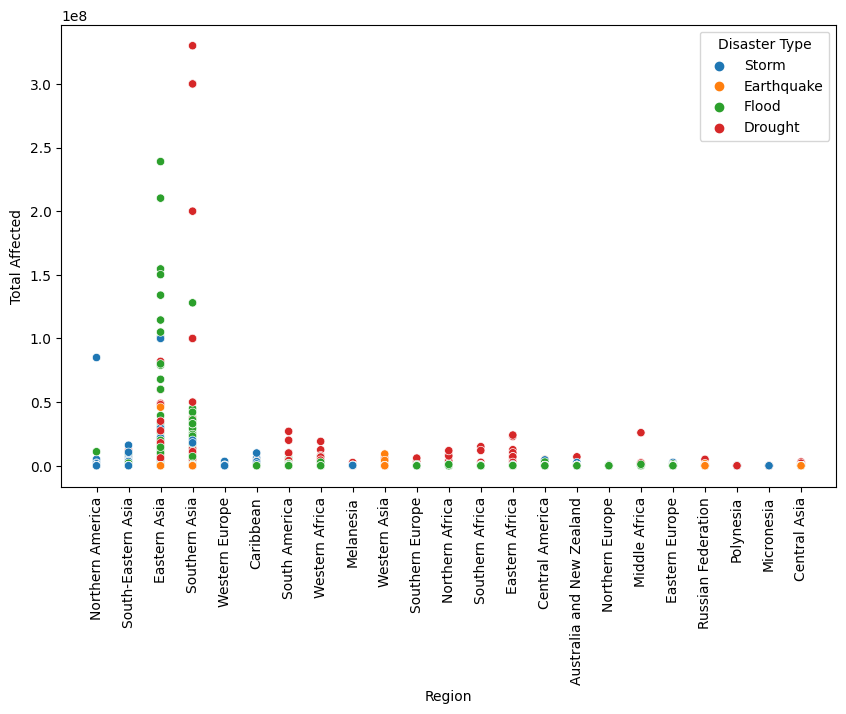

In [64]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.scatterplot(data=df_filtrado, x='Region', y='Total Affected', hue='Disaster Type')

<Axes: xlabel='Year', ylabel='Total Affected'>

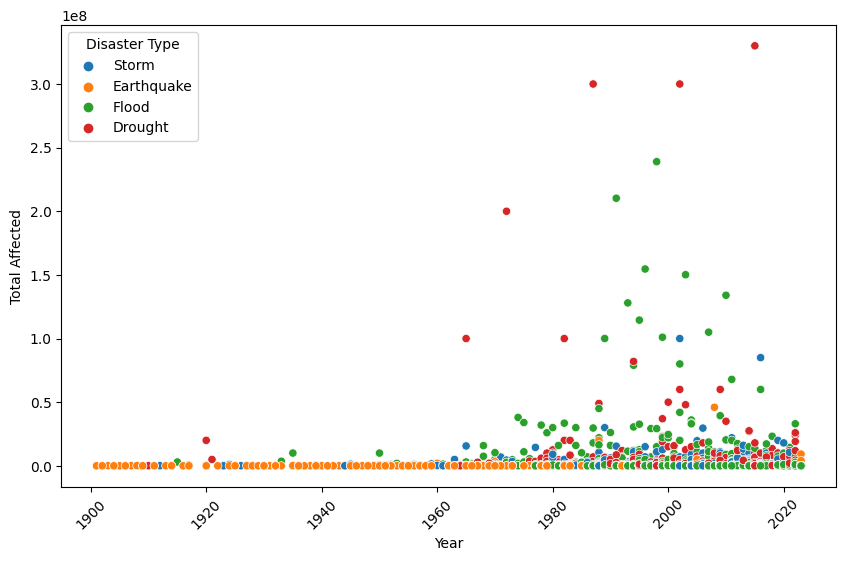

In [65]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(data=df_filtrado, x='Year', y='Total Affected', hue='Disaster Type')

<Axes: xlabel='Total Deaths', ylabel='Total Affected'>

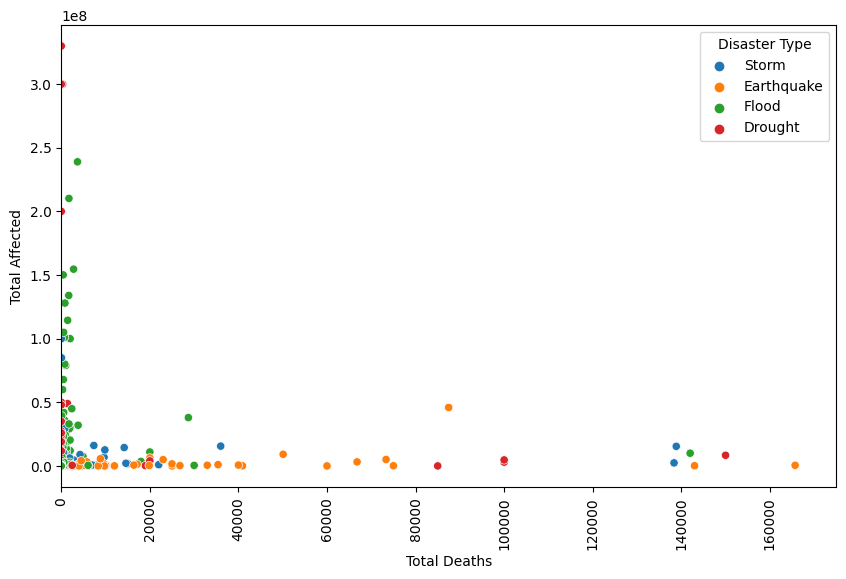

In [66]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlim(0, 175000)
sns.scatterplot(data=df_filtrado, x='Total Deaths', y='Total Affected', hue='Disaster Type')

<Axes: xlabel='Total Affected', ylabel='Total Damages Adj'>

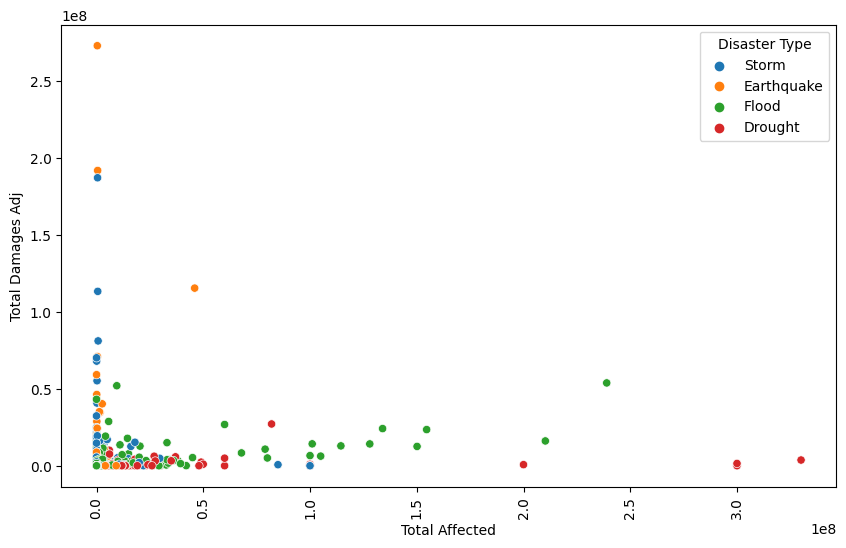

In [67]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.scatterplot(data=df_filtrado, x='Total Affected', y='Total Damages Adj', hue='Disaster Type')

In [55]:
# Función personalizada para tratar la columna Region
# def classify_disaster(Region):
    if 'Western Africa' in Region:
        return 1
    elif 'Southern Asia' in Region:
        return 2
    elif 'Central America' in Region:
        return 3
    elif 'South America' in Region:
        return 4
    elif 'Western Europe' in Region:
        return 5
    elif 'Eastern Asia' in Region:
        return 6
    elif 'Caribbean' in Region:
        return 7
    elif 'Northern Africa' in Region:
        return 8
    elif 'Northern America' in Region:
        return 9
    elif 'South-Eastern Asia' in Region:
        return 10
    elif 'Eastern Europe' in Region:
        return 11
    elif 'Southern Europe' in Region:
        return 12
    elif 'Melanesia' in Region:
        return 13
    elif 'Polynesia' in Region:
        return 14
    elif 'Eastern Africa' in Region:
        return 15
    elif 'Northern Europe' in Region:
        return 16
    elif 'Western Asia' in Region:
        return 17
    elif 'Micronesia' in Region:
        return 18
    elif 'Australia and New Zealand' in Region:
        return 19
    elif 'Southern Africa' in Region:
        return 20
    elif 'Middle Africa' in Region:
        return 21
    elif 'Russian Federation' in Region:
        return 22
    else:
        return 23
    
#df['Region_int'] = df['Region'].apply(classify_disaster)
#df['Region_int'].value_counts()

IndentationError: unexpected indent (2927411089.py, line 3)

In [68]:
categoricals = df_filtrado[['Disaster Type', 'Region']]
categoricals.head()

,Disaster Type,Region
23,Storm,Northern America
25,Earthquake,South-Eastern Asia
26,Flood,Eastern Asia
30,Flood,Eastern Asia
38,Drought,Eastern Asia


In [69]:
categoricals.shape

(9644, 2)

In [70]:
df_numericals= df_filtrado[['Year', 'Total Affected']]
df_numericals.head()

,Year,Total Affected
23,1912,2700
25,1914,20
26,1915,3000000
30,1917,635000
38,1920,20000000


In [71]:
df_numericals.shape

(9644, 2)

Hacer un OneHotEncoder para codificar las categóricas

In [72]:
categoricals = df_filtrado[['Disaster Type', 'Region']]
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
categorials_encoded = onehot_encoder.fit_transform(categoricals)

column_names = onehot_encoder.get_feature_names_out(categoricals.columns)

df_categoricals = pd.DataFrame(categorials_encoded, columns=column_names)
df_categoricals.head()

C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm,Region_Caribbean,Region_Central America,Region_Central Asia,Region_Eastern Africa,Region_Eastern Asia,Region_Eastern Europe,Region_Melanesia,...,Region_Polynesia,Region_Russian Federation,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df_categoricals.index = df_filtrado.index

In [74]:
df_modelo = pd.concat([df_categoricals, df_numericals], axis=1)
df_modelo.head(2)

,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm,Region_Caribbean,Region_Central America,Region_Central Asia,Region_Eastern Africa,Region_Eastern Asia,Region_Eastern Europe,Region_Melanesia,...,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe,Year,Total Affected
23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1912,2700
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1914,20


In [75]:
df_modelo.shape

(9644, 27)

In [76]:
df_modelo.isnull().sum()

Disaster Type_Earthquake     0
Disaster Type_Flood          0
Disaster Type_Storm          0
Region_Caribbean             0
Region_Central America       0
Region_Central Asia          0
Region_Eastern Africa        0
Region_Eastern Asia          0
Region_Eastern Europe        0
Region_Melanesia             0
Region_Micronesia            0
Region_Middle Africa         0
Region_Northern Africa       0
Region_Northern America      0
Region_Northern Europe       0
Region_Polynesia             0
Region_Russian Federation    0
Region_South America         0
Region_South-Eastern Asia    0
Region_Southern Africa       0
Region_Southern Asia         0
Region_Southern Europe       0
Region_Western Africa        0
Region_Western Asia          0
Region_Western Europe        0
Year                         0
Total Affected               0
dtype: int64

<Axes: >

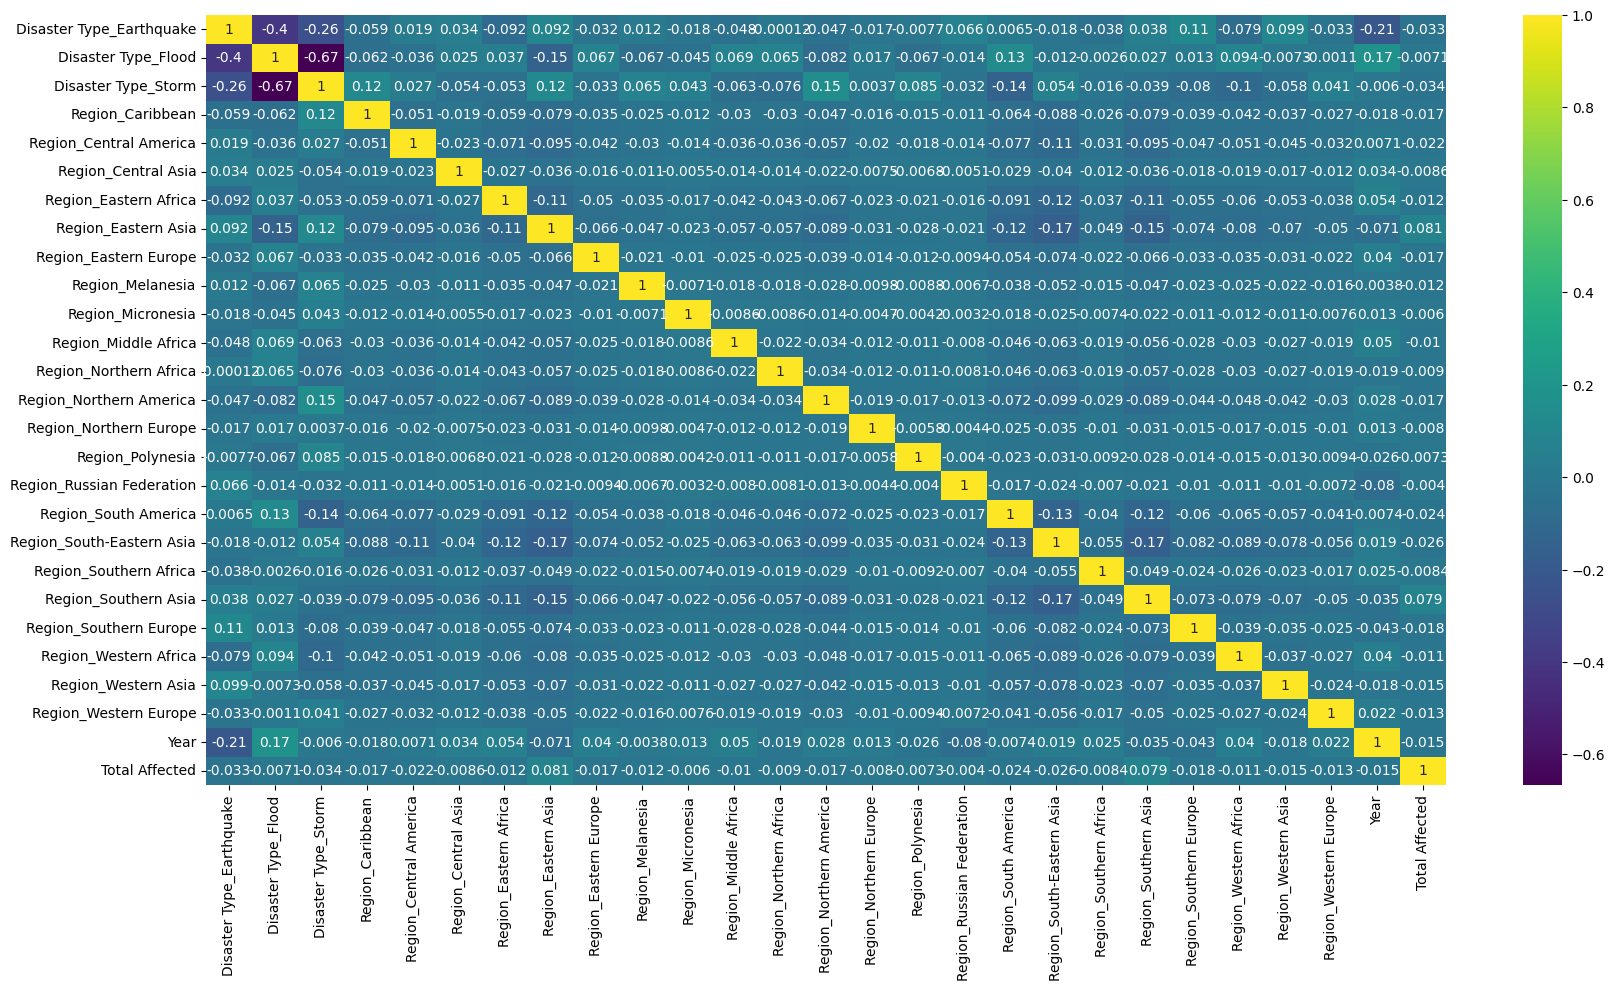

In [77]:
plt.figure(figsize=(20,10))
df_corr = df_modelo.corr(numeric_only = True)
sns.heatmap(df_corr, annot=True, cmap='viridis')

# REGRESION LINEAL MÚLTIPLE CON START YEAR, REGION, DISASTER TYPE


In [78]:
df_results = pd.DataFrame(columns= ['Nombre_modelo', 'mae_train', 'rmse_train','mae_test','rmse_test'])

In [79]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape} {y_train.shape}")
print(f"Test: {X_test.shape} {y_test.shape}")

Entrenamiento: (7715, 26) (7715,)
Test: (1929, 26) (1929,)


In [81]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']


model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'Regresion Lineal Múltiple',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.480137e+06,7.200482e+06,1.797816e+06,1.165747e+07


In [82]:
def plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test):
    resid_train = y_train - y_predictions_train
    resid_test = y_test - y_predictions_test

    sns.residplot(x=y_predictions_train, y=resid_train, color='b', lowess=True)
    plt.title('Residuos en entrenamiento')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

    sns.residplot(x=y_predictions_test, y=resid_test, color='r', lowess=True)
    plt.title('Residuos en test')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

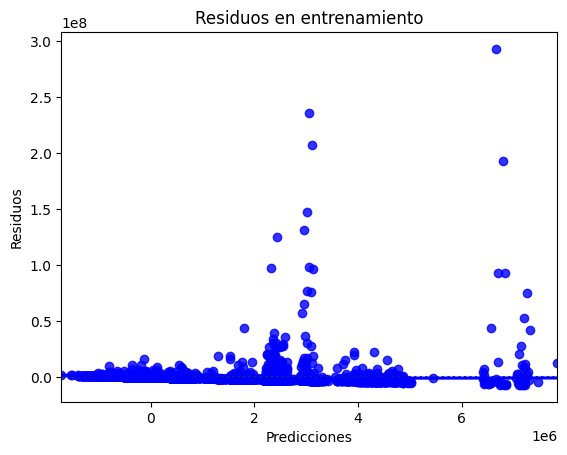

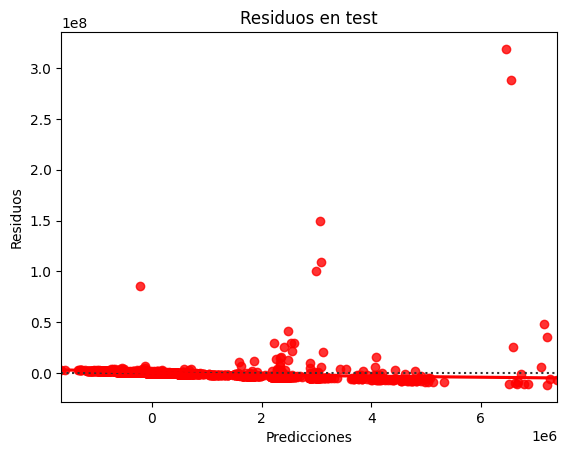

In [ ]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

# REGRESION LINEAL MÚLTIPLE POLINÓMICA CON START YEAR, REGION, DISASTER TYPE


In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = PolynomialFeatures(degree=2)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'Regresion Lineal Múltiple Polinómica (grado 2)',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.480137e+06,7.200482e+06,1.797816e+06,1.165747e+07
1,Regresion Lineal Múltiple Polinómica (grado 2),1.291050e+06,6.972198e+06,1.655309e+06,1.118134e+07


In [85]:
def plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test):
    resid_train = y_train - y_predictions_train
    resid_test = y_test - y_predictions_test

    sns.residplot(x=y_predictions_train, y=resid_train, color='b', lowess=True)
    plt.title('Residuos en entrenamiento')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

    sns.residplot(x=y_predictions_test, y=resid_test, color='r', lowess=True)
    plt.title('Residuos en test')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

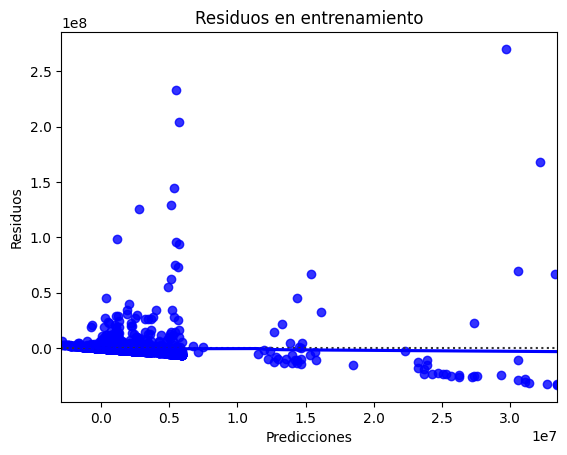

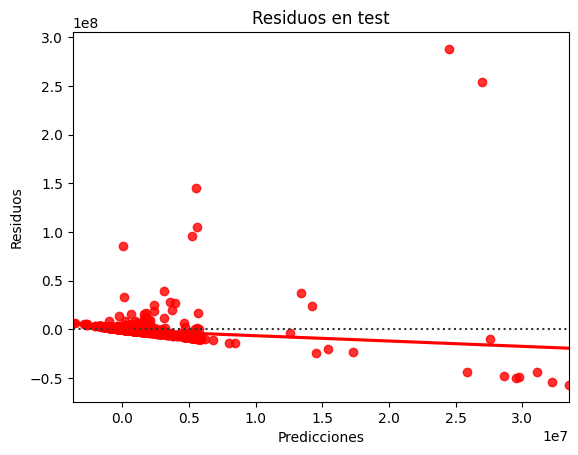

In [86]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

In [87]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = PolynomialFeatures(degree=3)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'Regresion Lineal Múltiple Polinómica (grado 3)',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.480137e+06,7.200482e+06,1.797816e+06,1.165747e+07
1,Regresion Lineal Múltiple Polinómica (grado 2),1.291050e+06,6.972198e+06,1.655309e+06,1.118134e+07
2,Regresion Lineal Múltiple Polinómica (grado 3),1.245443e+06,6.866815e+06,1.818854e+06,1.225268e+07


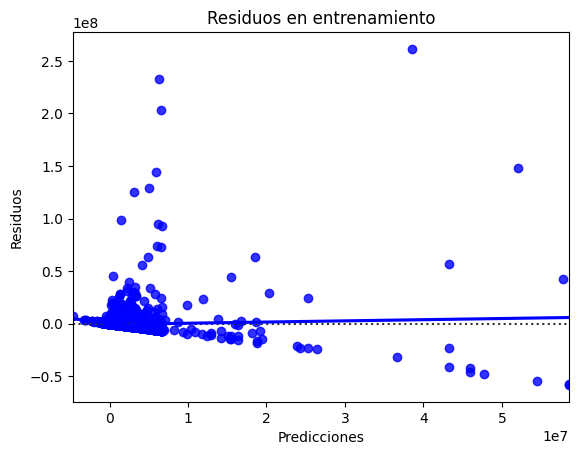

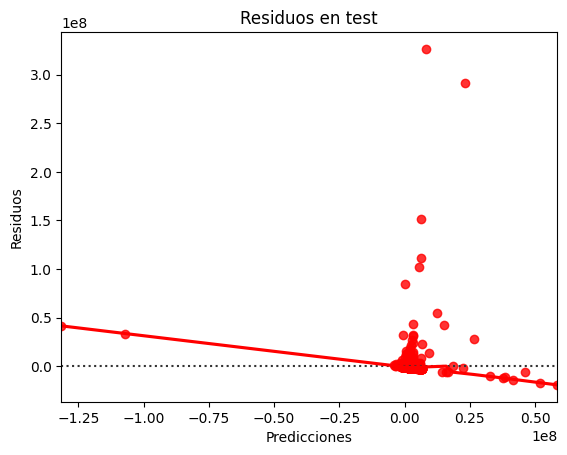

In [88]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

In [89]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'KNNRegressor n_neighbors 3',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.480137e+06,7.200482e+06,1.797816e+06,1.165747e+07
1,Regresion Lineal Múltiple Polinómica (grado 2),1.291050e+06,6.972198e+06,1.655309e+06,1.118134e+07
2,Regresion Lineal Múltiple Polinómica (grado 3),1.245443e+06,6.866815e+06,1.818854e+06,1.225268e+07
3,KNNRegressor n_neighbors 3,9.606829e+05,6.191755e+06,1.776812e+06,1.274522e+07


In [90]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'KNNRegressor n_neighbors 5',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.480137e+06,7.200482e+06,1.797816e+06,1.165747e+07
1,Regresion Lineal Múltiple Polinómica (grado 2),1.291050e+06,6.972198e+06,1.655309e+06,1.118134e+07
2,Regresion Lineal Múltiple Polinómica (grado 3),1.245443e+06,6.866815e+06,1.818854e+06,1.225268e+07
3,KNNRegressor n_neighbors 3,9.606829e+05,6.191755e+06,1.776812e+06,1.274522e+07
4,KNNRegressor n_neighbors 5,1.067729e+06,6.488592e+06,1.703631e+06,1.241924e+07


In [91]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'KNNRegressor n_neighbors 7',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head(10)

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.480137e+06,7.200482e+06,1.797816e+06,1.165747e+07
1,Regresion Lineal Múltiple Polinómica (grado 2),1.291050e+06,6.972198e+06,1.655309e+06,1.118134e+07
2,Regresion Lineal Múltiple Polinómica (grado 3),1.245443e+06,6.866815e+06,1.818854e+06,1.225268e+07
3,KNNRegressor n_neighbors 3,9.606829e+05,6.191755e+06,1.776812e+06,1.274522e+07
4,KNNRegressor n_neighbors 5,1.067729e+06,6.488592e+06,1.703631e+06,1.241924e+07
5,KNNRegressor n_neighbors 7,1.123607e+06,6.789406e+06,1.601241e+06,1.207543e+07
